In [140]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [141]:
from google.colab import drive
drive.mount('/content/gdrive')
# Change working directory to be current folder
import os
os.chdir('/content/gdrive/My Drive/force_data3BW')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
BW0.1N	BW0.2N	BW0.3N	BW0.5N	BW0N


In [142]:
import pathlib
data_dir = '/content/gdrive/My Drive/force_data3BW'
data_dir = pathlib.Path(data_dir)
print(data_dir)

/content/gdrive/My Drive/force_data3BW


In [143]:
image_count = len(list(data_dir.glob('*/.JPG')))
print(image_count)


0


In [144]:
circle = list(data_dir.glob('circle/*'))
#PIL.Image.open(str(circle[0]))


In [145]:
batch_size = 32
img_height = 180
img_width = 180 

In [146]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 56 files belonging to 5 classes.
Using 45 files for training.


In [147]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 56 files belonging to 5 classes.
Using 11 files for validation.


In [148]:
class_names = train_ds.class_names
print(class_names)

['BW0.1N', 'BW0.2N', 'BW0.3N', 'BW0.5N', 'BW0N']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


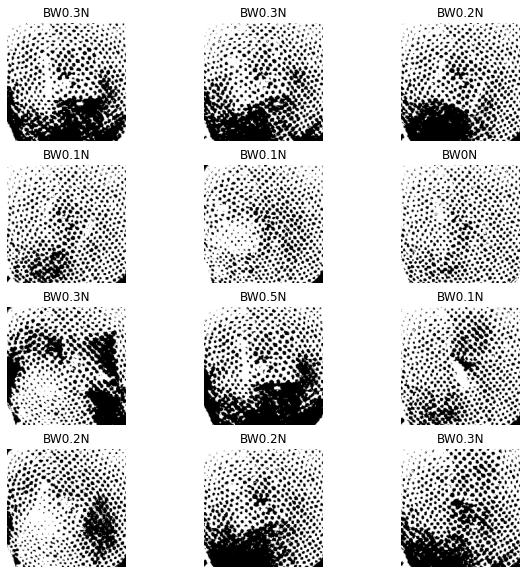

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(4):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [150]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [151]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [152]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [153]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [154]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_10 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 22, 22, 64)      

In [155]:
epochs=15
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/15
2/2 [==============================] - 0s 118ms/step - loss: 13.5561 - accuracy: 0.2889 - val_loss: 8.3496 - val_accuracy: 0.3636
Epoch 2/15
2/2 [==============================] - 0s 33ms/step - loss: 3.3821 - accuracy: 0.2889 - val_loss: 1.7119 - val_accuracy: 0.0909
Epoch 3/15
2/2 [==============================] - 0s 28ms/step - loss: 1.5806 - accuracy: 0.2222 - val_loss: 1.7695 - val_accuracy: 0.2727
Epoch 4/15
2/2 [==============================] - 0s 30ms/step - loss: 1.5618 - accuracy: 0.3111 - val_loss: 1.6082 - val_accuracy: 0.1818
Epoch 5/15
2/2 [==============================] - 0s 31ms/step - loss: 1.4449 - accuracy: 0.4444 - val_loss: 1.4783 - val_accuracy: 0.4545
Epoch 6/15
2/2 [==============================] - 0s 29ms/step - loss: 1.3933 - accuracy: 0.5333 - val_loss: 1.4873 - val_accuracy: 0.4545
Epoch 7/15
2/2 [==============================] - 0s 33ms/step - loss: 1.3177 - accuracy: 0.4667 - val_loss: 1.4359 - val_accuracy: 0.4545
Epoch 8/15
2/2 [=========

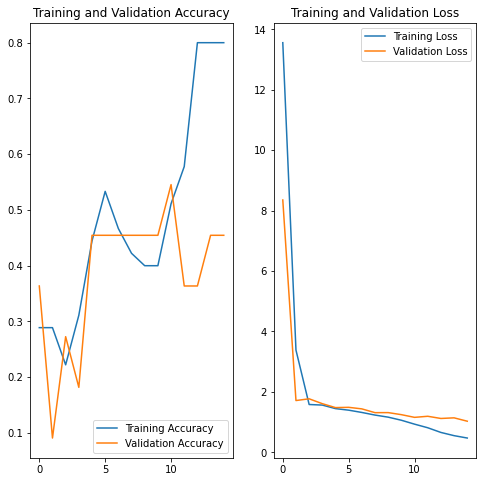

In [156]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [157]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [158]:
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#   for i in range(9):
#     augmented_images = data_augmentation(images)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_images[0].numpy().astype("uint8"))
#     plt.axis("off")

In [159]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [160]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [161]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_16 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_11 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 45, 45, 64)      

In [162]:
epochs = 50
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/50
2/2 [==============================] - 0s 93ms/step - loss: 2.7476 - accuracy: 0.2222 - val_loss: 10.0123 - val_accuracy: 0.0909
Epoch 2/50
2/2 [==============================] - 0s 35ms/step - loss: 4.3759 - accuracy: 0.2444 - val_loss: 2.9336 - val_accuracy: 0.1818
Epoch 3/50
2/2 [==============================] - 0s 31ms/step - loss: 2.3774 - accuracy: 0.2889 - val_loss: 2.1862 - val_accuracy: 0.3636
Epoch 4/50
2/2 [==============================] - 0s 30ms/step - loss: 2.1079 - accuracy: 0.1556 - val_loss: 1.6550 - val_accuracy: 0.3636
Epoch 5/50
2/2 [==============================] - 0s 30ms/step - loss: 1.7365 - accuracy: 0.1556 - val_loss: 1.5070 - val_accuracy: 0.3636
Epoch 6/50
2/2 [==============================] - 0s 38ms/step - loss: 1.6136 - accuracy: 0.1556 - val_loss: 1.5164 - val_accuracy: 0.3636
Epoch 7/50
2/2 [==============================] - 0s 34ms/step - loss: 1.5914 - accuracy: 0.1556 - val_loss: 1.5241 - val_accuracy: 0.3636
Epoch 8/50
2/2 [==========

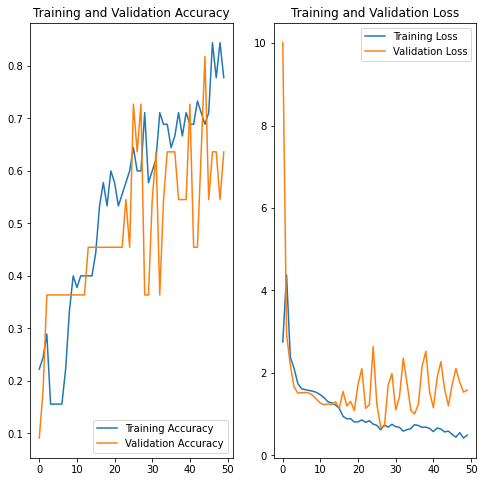

In [163]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [164]:
query_dir = '/content/gdrive/My Drive' #put query image path here
query_dir = pathlib.Path(query_dir)
query_path = '/content/gdrive/My Drive/data/0.1N (7).jpg'
print(query_dir)

img = keras.preprocessing.image.load_img(query_path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))

/content/gdrive/My Drive
This image most likely belongs to BW0.2N with a 100.00 percent confidence.
